## Exploratory Data Analysis for Customers dataset

**Aim- To analyse a shop's data to better understand it's customers. It helps a business to grow.**


**-The owner of a shop gets information about Customers through membership cards.**

**-Dataset consists of 2000 records and 8 columns:**

1) **Customer ID**- the identifier

2) **Gender**- Male or female customers

3) **Age**- age range of customers

4) **Annual Income**- income range of customers

5) **Spending Score** - Score assigned by the shop, based on customer behavior and spending nature

6) **Profession**- their work skill

7) **Work Experience** - in years

8) **Family Size**- their family size**

**It contains 6 numerical and 2 categorical values**

### import libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### read dataset

In [2]:
df=pd.read_csv('Customers.csv')
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


### display all columns of dataset

In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

## Data Preprocessing
1) Check datatype and unique values of each feature

2) Remove the unwanted features

3)Check null values and handle them

### Check datatype of each column

In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object

### Check unique value for each column

In [5]:
df.nunique()

CustomerID                2000
Gender                       2
Age                        100
Annual Income ($)         1786
Spending Score (1-100)     101
Profession                   9
Work Experience             18
Family Size                  9
dtype: int64

### Removing column which is not required

In [6]:
df.drop('CustomerID',axis=1,inplace=True) #not required for analysis
df

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1995,Female,71,184387,40,Artist,8,7
1996,Female,91,73158,32,Doctor,7,7
1997,Male,87,90961,14,Healthcare,9,2
1998,Male,77,182109,4,Executive,7,2


### Checking Null Values

In [7]:
df.isnull().sum()

Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

### Replacing the null values with 'Unknown'

In [8]:
df.Profession.fillna('Unknown',inplace=True)

### Checking if null values have been successfully handled

In [9]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

### Statistical description about the dataset

In [10]:
df.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,48.960000,110731.821500,50.962500,4.102500,3.768500
std,28.429747,45739.536688,27.934661,3.922204,1.970749
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,73.000000,149092.750000,75.000000,7.000000,5.000000
max,99.000000,189974.000000,100.000000,17.000000,9.000000


**Observation-The average age,Annual Income,Spending Score,Work Experience,Family Size of customers is 48 years,$110045,50,3 years,4 respectively**

### Checking the relationship among features

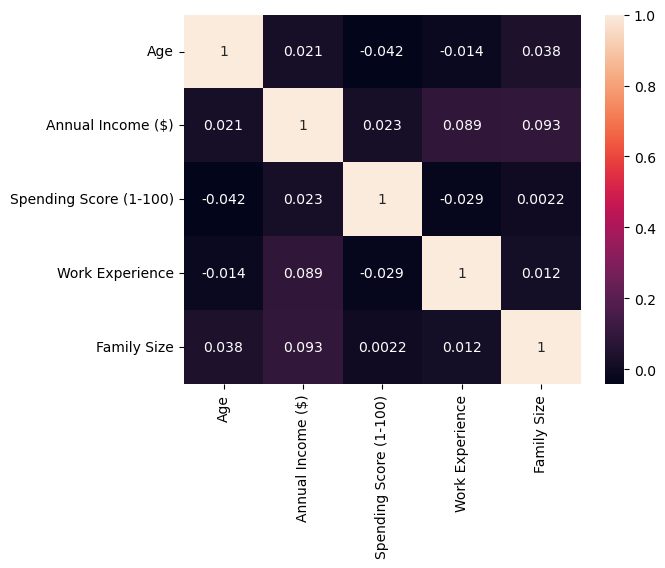

In [11]:
sns.heatmap(df.corr(),annot=True)
plt.show()

**Observation- There is no significant relationship among the variables**

### Which profession has the highest Annual Income?

In [12]:
x=df.groupby('Profession')['Annual Income ($)'].mean().sort_values(ascending=False)
x

Profession
Unknown          117233.828571
Executive        113770.130719
Healthcare       112574.041298
Doctor           111573.217391
Engineer         111161.240223
Lawyer           110995.838028
Entertainment    110650.333333
Artist           108776.580065
Homemaker        108758.616667
Marketing        107994.211765
Name: Annual Income ($), dtype: float64

**Observation- The people with unknown profession have highest Annual Income**

### How many male and female customers arrive as per their profession?

In [13]:
y=df.groupby('Profession')['Gender'].value_counts()
y

Profession     Gender
Artist         Female    380
               Male      232
Doctor         Female     89
               Male       72
Engineer       Female    103
               Male       76
Entertainment  Female    133
               Male      101
Executive      Female     87
               Male       66
Healthcare     Female    196
               Male      143
Homemaker      Female     39
               Male       21
Lawyer         Female     86
               Male       56
Marketing      Female     53
               Male       32
Unknown        Female     20
               Male       15
Name: Gender, dtype: int64

**Observation- Female customers shop more than the Men**

### How different professions spend in the store?

In [14]:
sp=pd.pivot_table(data=df[['Profession','Spending Score (1-100)']],index='Profession',values='Spending Score (1-100)',aggfunc=sum).sort_values(by='Spending Score (1-100)',ascending=False)
sp

,Spending Score (1-100)
Profession,
Artist,32239
Healthcare,17125
Entertainment,12388
Engineer,8765
Doctor,8356
Executive,7635
Lawyer,6938
Marketing,4141
Homemaker,2783


**Observation-Artists have the highest spending score whereas people with Unknown profession have the lowest**

### How different age groups spend?

In [15]:
till_25=(df['Age']<=25)
till_25=df[till_25]
from_25_50=(df['Age']>25) & (df['Age']<=50)
from_25_50=df[from_25_50]
above_50=(df['Age']>50)
above_50=df[above_50]

x1=till_25['Spending Score (1-100)'].sum()
x2=from_25_50['Spending Score (1-100)'].sum()
x3=above_50['Spending Score (1-100)'].sum()

age_spending_score={"Age":['<25 years','25-50 years','> 50 years'],"Total spending score":[x1,x2,x3]}
ageSpending_df=pd.DataFrame(age_spending_score)
ageSpending_df

,Age,Total spending score
0,<25 years,27648
1,25-50 years,26216
2,> 50 years,48061


**Observation-People more than 50 years of age have the highest spending score**

### Profession wise family size

In [16]:
fam_size=pd.crosstab(df['Profession'],df['Family Size'])
fam_size

Family Size,1,2,3,4,5,6,7,8,9
Profession,,,,,,,,,
Artist,98,115,100,86,74,80,58,1,0
Doctor,26,36,25,17,15,19,23,0,0
Engineer,32,35,20,32,26,18,15,1,0
Entertainment,30,45,33,32,33,29,32,0,0
Executive,16,22,31,22,25,18,19,0,0
Healthcare,44,53,56,54,47,42,41,2,0
Homemaker,8,11,6,12,6,2,15,0,0
Lawyer,27,30,18,14,17,22,13,0,1
Marketing,13,12,19,12,9,10,10,0,0


**Observation-People have diversified number of members in their family**

### Profession wise work experience

In [17]:
work_exp=pd.crosstab(df['Profession'],df['Work Experience'])
work_exp

Work Experience,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Profession,,,,,,,,,,,,,,,,,,
Artist,127,132,21,17,44,44,39,40,46,47,28,2,5,6,4,6,0,4
Doctor,33,45,4,1,10,9,11,7,8,12,5,2,2,3,6,2,1,0
Engineer,42,39,4,7,10,10,11,14,18,14,5,2,0,1,0,1,1,0
Entertainment,57,68,8,4,13,9,13,12,21,14,8,2,1,1,2,1,0,0
Executive,34,34,2,3,10,12,9,7,10,19,8,0,2,0,1,1,1,0
Healthcare,78,75,11,12,20,14,20,24,35,26,13,3,3,1,1,2,1,0
Homemaker,4,5,4,3,4,4,4,3,11,12,2,1,2,0,1,0,0,0
Lawyer,34,45,2,3,8,7,6,9,8,7,8,1,0,2,0,0,1,1
Marketing,15,23,5,3,2,3,6,4,7,6,6,0,1,2,1,1,0,0


**Observation-People who shop the most are freshers in their respective industries or have no work experience**

### Histogram to show distribution of all numerical columns

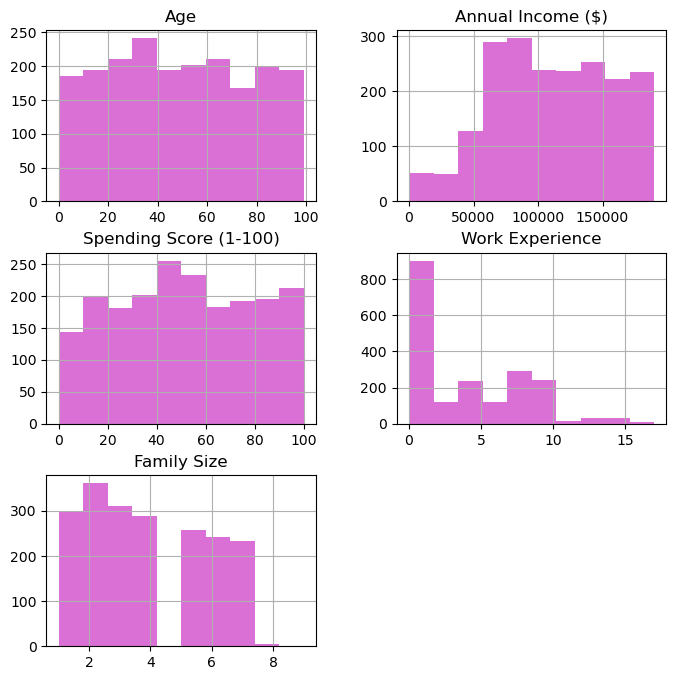

In [18]:
df.hist(figsize=(8,8),color='orchid')
plt.show()

### Expenses divided by gender

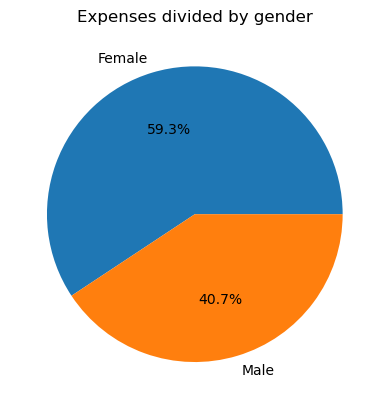

In [19]:
plt.title("Expenses divided by gender")
plt.pie(df['Gender'].value_counts(),labels=['Female','Male'],autopct="%1.1f%%")
plt.show()

**Observation-Female Customers spend more than the male** 

### Distribution of Annual Income

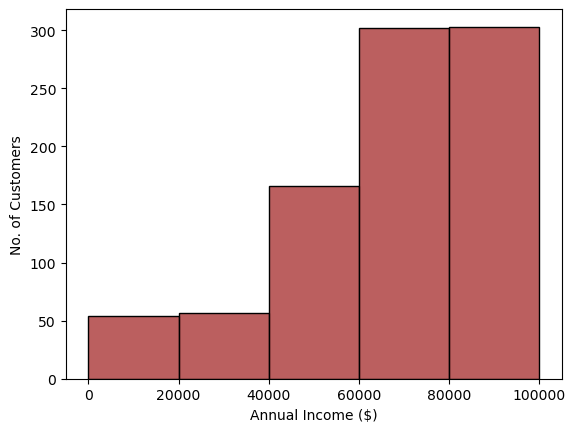

In [20]:
sns.histplot(df['Annual Income ($)'], bins = [0,20000,40000,60000,80000,100000],color='brown')
plt.ylabel("No. of Customers")
plt.show()


**Observation- The highest number of customers have their annual income from $60K-$80K**

### Spending score analysis

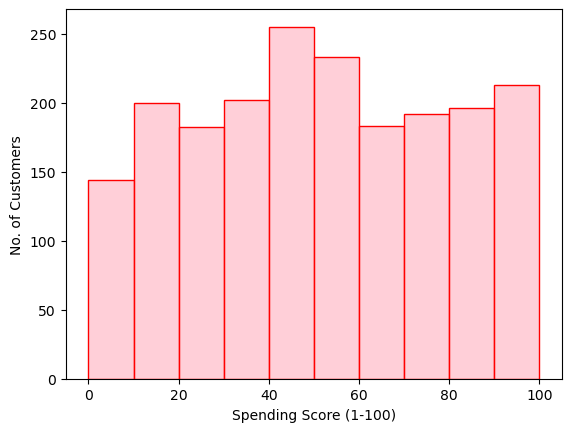

In [21]:
sns.histplot(df['Spending Score (1-100)'], bins = [0,10,20,30,40,50,60,70,80,90,100],color = "pink", ec="red")
plt.ylabel("No. of Customers")
plt.show()

**Observation- The highest spending score is between 40-50 and then 50-60**

### Distribution of Professions

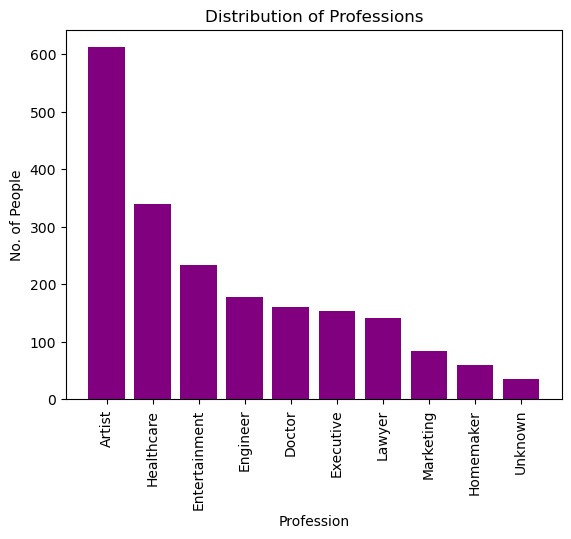

In [22]:
profession_counts = df["Profession"].value_counts()
plt.bar(profession_counts.index, profession_counts.values,color='purple')
plt.xticks(rotation=90)
plt.xlabel("Profession")
plt.ylabel("No. of People")
plt.title("Distribution of Professions")
plt.show()

**Observation- Mostly our customers are Artists, then in healthcare, then in entertainment, then engineer and doctor.**

### Profession distribution based on gender

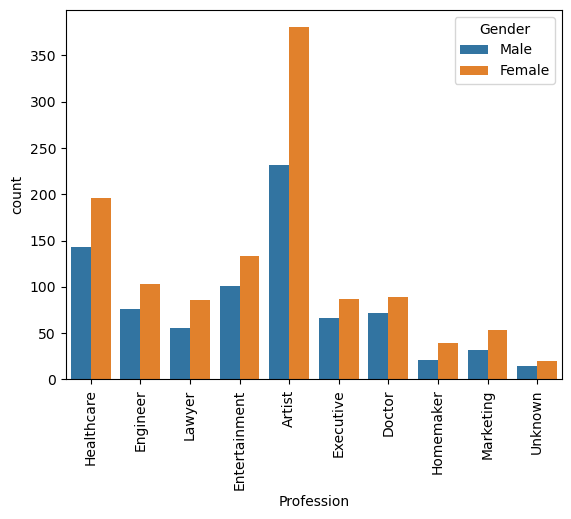

In [23]:
sns.countplot(data = df,x="Profession",hue="Gender")
plt.xticks(rotation=90)
plt.show()

**Observation-The count of Females is more**

### Annual Income based on Profession 

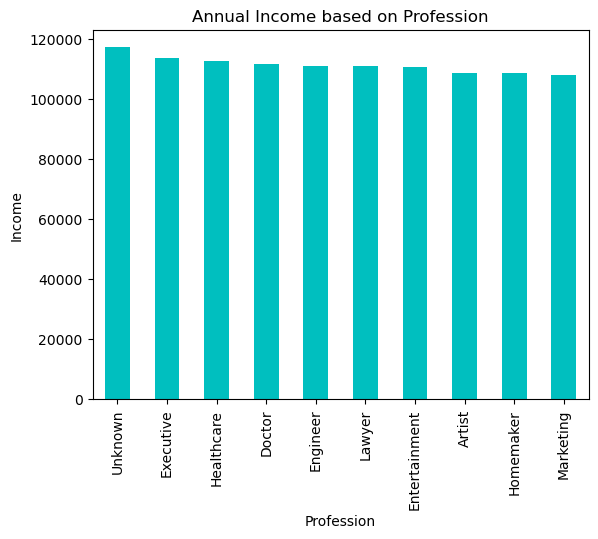

In [24]:
x.plot(kind="bar",color='c')
plt.title('Annual Income based on Profession')
plt.ylabel('Income')
plt.show()

**Observation- Unknown, Executive, Healthcare and Doctor have high annual income** 

### Spending Score based on Profession

In [25]:
y=df.groupby('Profession')['Spending Score (1-100)'].mean()
y

Profession
Artist           52.678105
Doctor           51.900621
Engineer         48.966480
Entertainment    52.940171
Executive        49.901961
Healthcare       50.516224
Homemaker        46.383333
Lawyer           48.859155
Marketing        48.717647
Unknown          44.428571
Name: Spending Score (1-100), dtype: float64

### Visualization Spending Score based on Profession

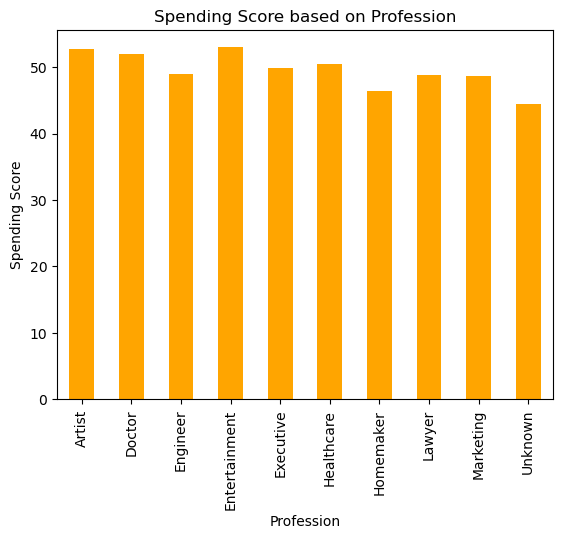

In [26]:
y.plot(kind="bar",color='orange')
plt.title('Spending Score based on Profession')
plt.ylabel('Spending Score')
plt.show()

**Observation- Entertainment, Artist, Doctor, and then Healthcare Professions have high spending_score.**

### Family Size

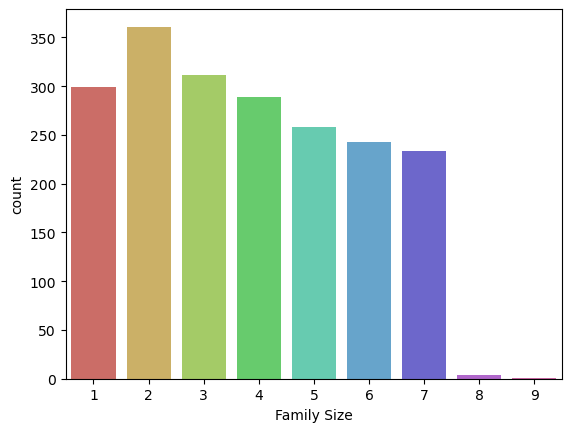

In [27]:
sns.countplot(x='Family Size', data=df, palette="hls")
plt.show()

**Observation-The most common family size that customers have is 2.**

### Work Experience

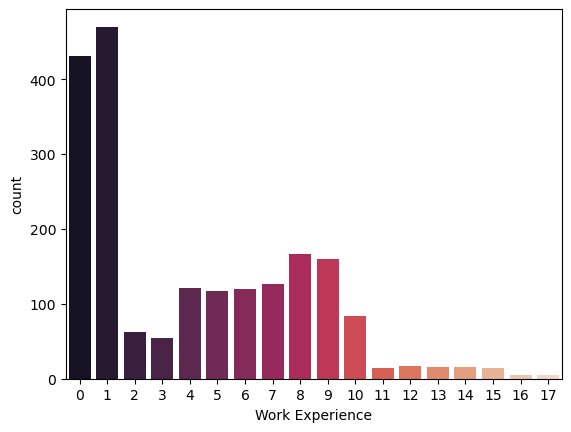

In [28]:
sns.countplot(x='Work Experience', data=df, palette="rocket")
plt.show()

**Observation-The most work experience of customers is 1 year and 0 year experience.**

#### Conclusion- 

1) Females shop more than men.

2) Artist, Entertainment, Doctor, and then Healthcare Professions have high spending_score.

3) Mostly our customers are artists, then in healthcare, then in entertainment, then engineer and doctor.

4) People with unknown profession have highest annual income

5) People have 2 members commonly in their family.

6) People who shop the most are freshers in their respective industries or have no work experience

7) People more than 50 years of age have high spending scores

**Reference: https://www.kaggle.com/datasets/datascientistanna/customers-dataset**

In [29]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
